<a href="https://colab.research.google.com/github/Elbina-Paudel/Deep-Learning-Based-Breast-Cancer-Classification-Using-PyTorch-and-Hybrid-CNN-MLP-Architecture/blob/main/Deep_Learning_Based_Breast_Cancer_Classification_Using_PyTorch_and_Hybrid_CNN_MLP_Architecture_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:

!pip install xgboost scikit-learn torchmetrics seaborn --quiet


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 961.5/961.5 kB 55.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 104.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 75.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 52.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 12.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 5.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 85.4 MB/s eta 0:00:00


In [ ]:
import pandas as pd
data_path = '/content/drive/MyDrive/Dataset/data.csv'
df = pd.read_csv(data_path)

print("Data Shape:", df.shape)
df.head()


Data Shape: (569, 33)


,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Check Missing Values
print(df.isnull().sum())

id                           0
diagnosis                    0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave points_worst         0
symmetry_worst               0
fractal_dimension_worst      0
Unnamed:

In [ ]:
# Drop Unnecessary Columns
df.drop(['Unnamed: 32', 'id'], axis=1, inplace=True)

In [ ]:
# Encode Diagnosis
df['diagnosis'] = df['diagnosis'].map({'M':1, 'B':0})

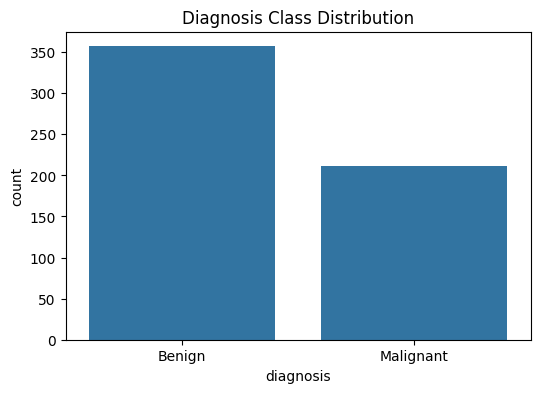

In [ ]:
# Class Distribution
plt.figure(figsize=(6,4))
sns.countplot(x='diagnosis', data=df)
plt.title('Diagnosis Class Distribution')
plt.xticks([0,1], ['Benign', 'Malignant'])
plt.show()

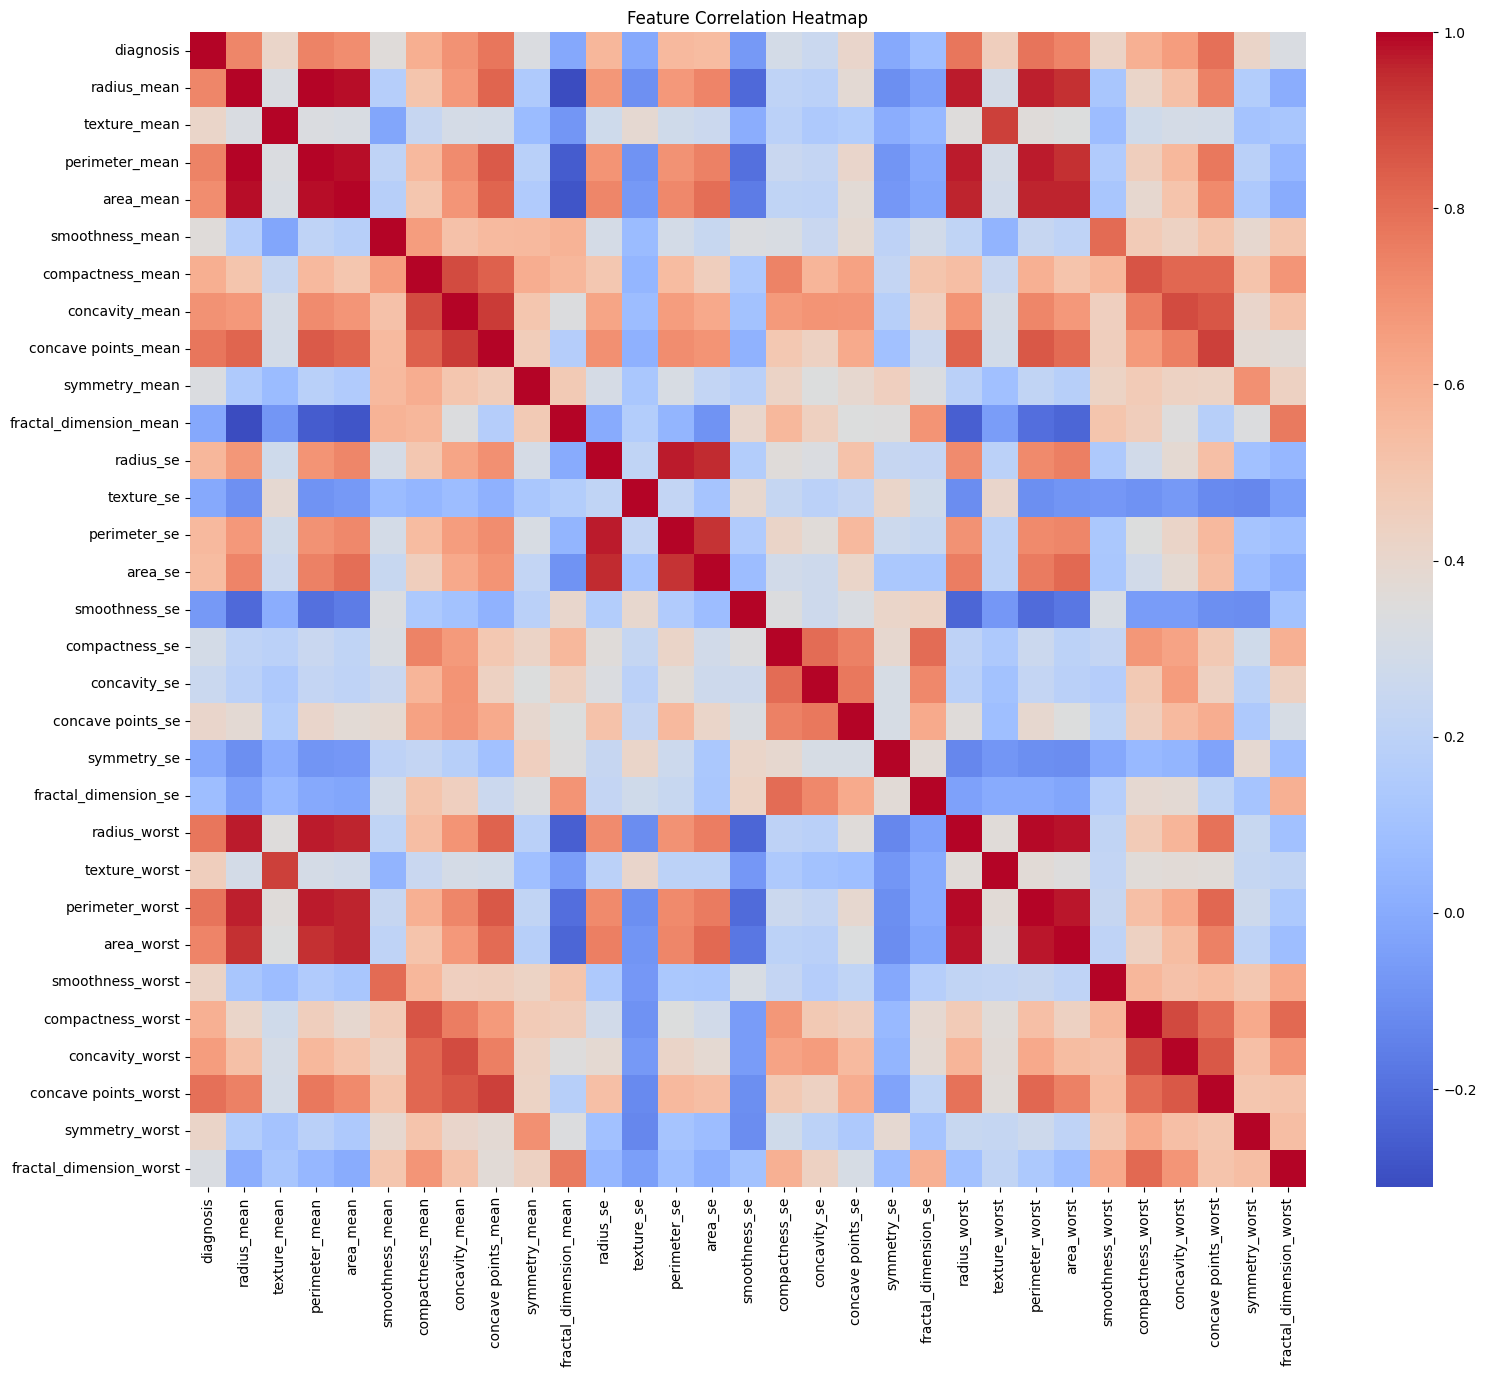

In [ ]:
# Correlation Heatmap
plt.figure(figsize=(18,15))
corr = df.corr()
sns.heatmap(corr, cmap='coolwarm', annot=False)
plt.title('Feature Correlation Heatmap')
plt.show()

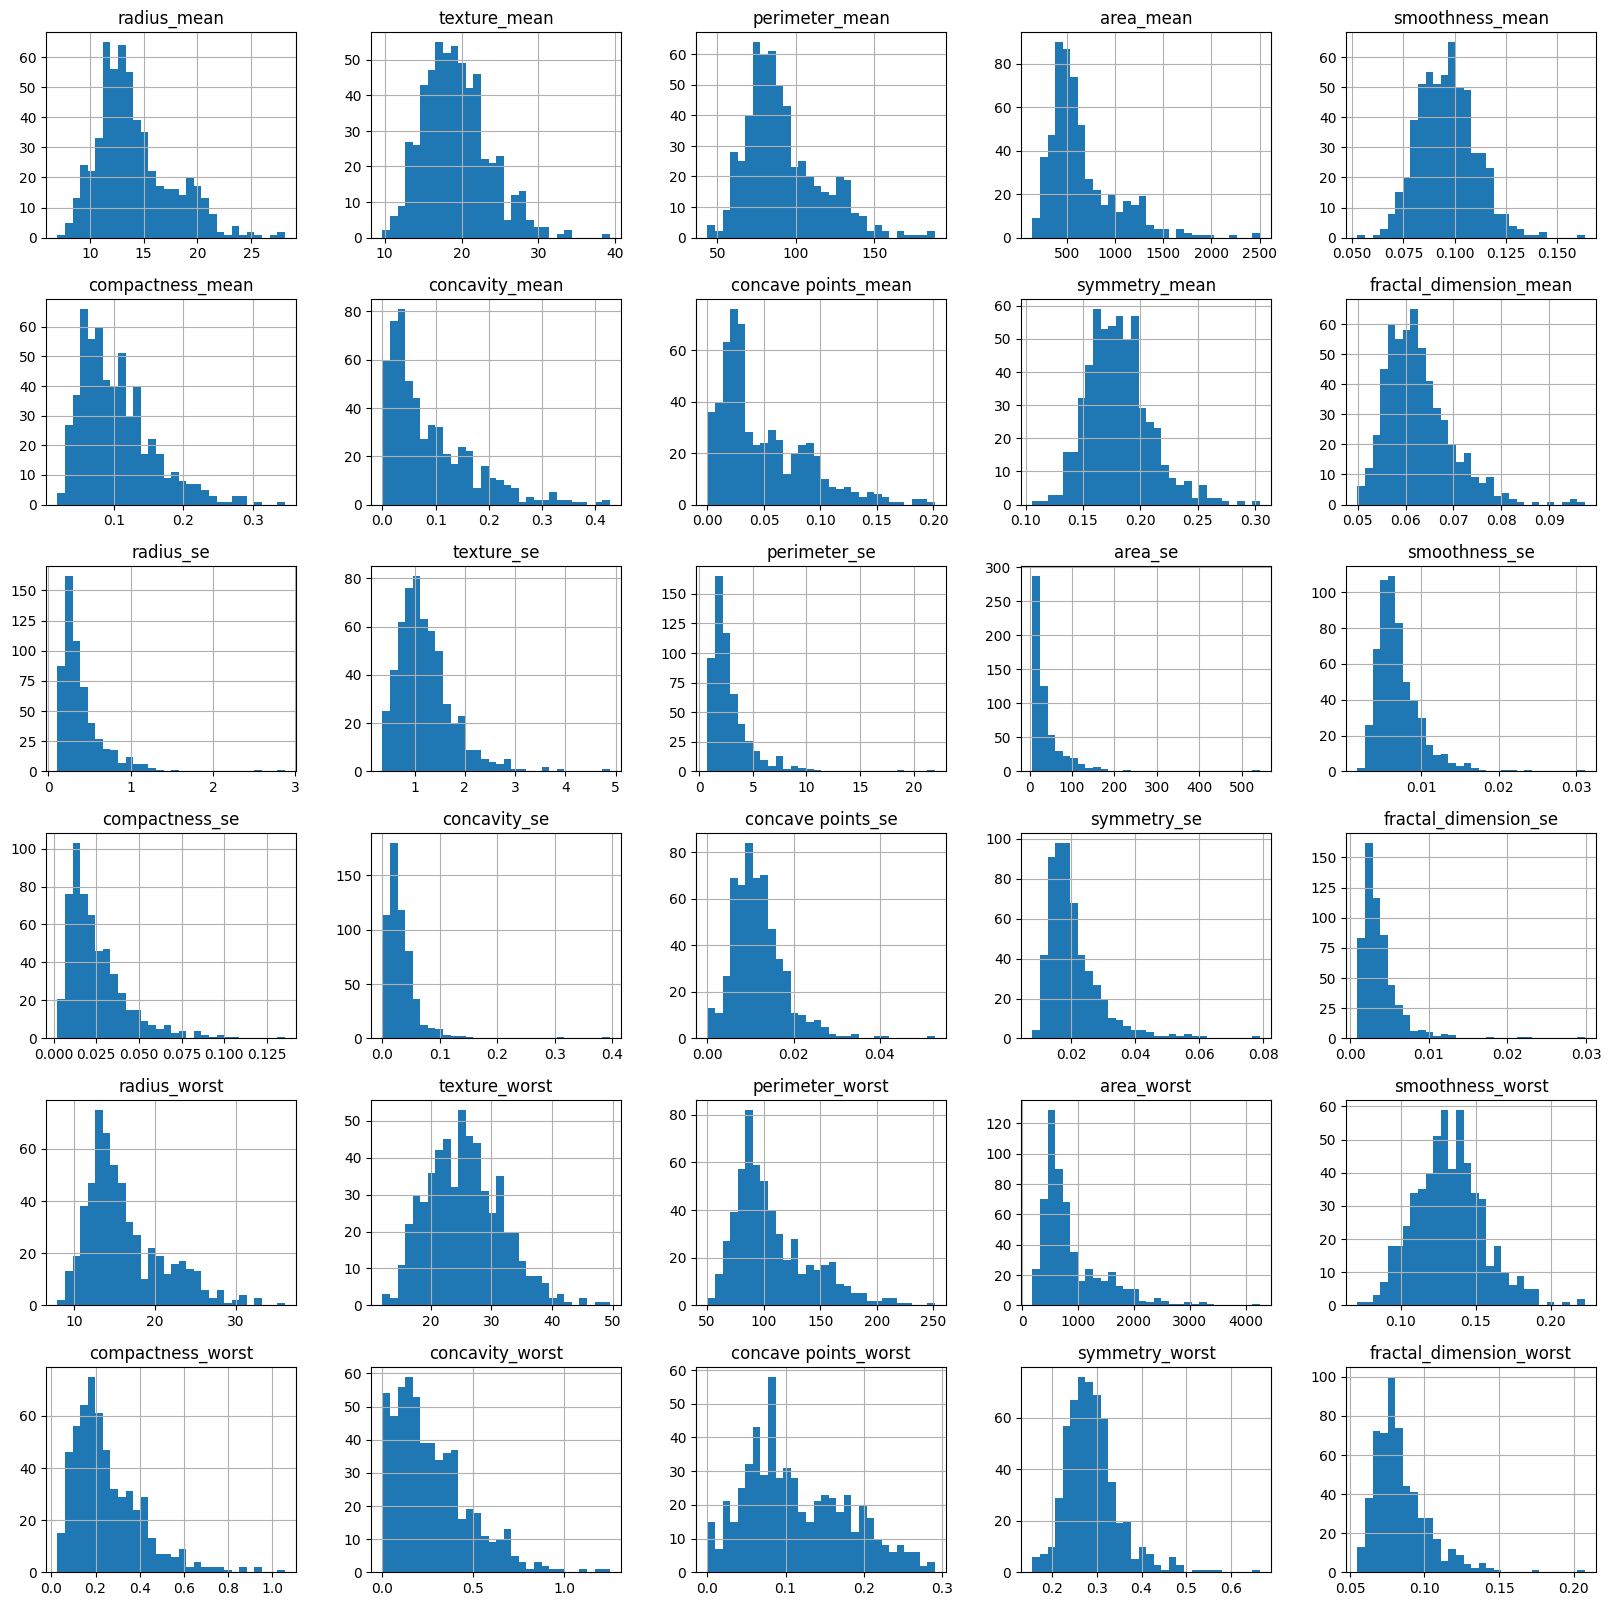

In [ ]:
# Histogram Features
df.drop('diagnosis', axis=1).hist(bins=30, figsize=(20,20))
plt.show()

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Split Features and Labels
X = df.drop('diagnosis', axis=1)
y = df['diagnosis']

# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [ ]:
import torch
from torch.utils.data import TensorDataset, DataLoader

# Convert to tensors
X_train_tensor = torch.tensor(X_train, dtype=torch.float32).unsqueeze(1) # (batch_size, channels=1, features)
X_test_tensor = torch.tensor(X_test, dtype=torch.float32).unsqueeze(1)
y_train_tensor = torch.tensor(y_train.values, dtype=torch.long)
y_test_tensor = torch.tensor(y_test.values, dtype=torch.long)

# DataLoader
train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
test_dataset = TensorDataset(X_test_tensor, y_test_tensor)

train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=32)


In [ ]:
#Build CNN + MLP Model
import torch.nn as nn
class BreastCancerNet(nn.Module):
    def __init__(self):
        super(BreastCancerNet, self).__init__()
        self.cnn = nn.Conv1d(1, 32, kernel_size=3, padding=1)
        self.relu = nn.ReLU()
        self.dropout = nn.Dropout(0.5)
        self.fc1 = nn.Linear(32*30, 128)
        self.fc2 = nn.Linear(128, 2)

    def forward(self, x):
        x = self.cnn(x)
        x = self.relu(x)
        x = self.dropout(x)
        x = x.view(x.size(0), -1)
        x = self.fc1(x)
        x = self.relu(x)
        x = self.dropout(x)
        x = self.fc2(x)
        return x

model = BreastCancerNet()
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model.to(device)

import torch.optim as optim
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)


In [ ]:
#Train Model + Track Losses
train_losses, test_losses = [], []
epochs = 40

for epoch in range(epochs):
    model.train()
    train_loss = 0
    for inputs, labels in train_loader:
        inputs, labels = inputs.to(device), labels.to(device)
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        train_loss += loss.item()

    train_losses.append(train_loss/len(train_loader))

    model.eval()
    test_loss = 0
    with torch.no_grad():
        for inputs, labels in test_loader:
            inputs, labels = inputs.to(device), labels.to(device)
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            test_loss += loss.item()
    test_losses.append(test_loss/len(test_loader))

    print(f"Epoch [{epoch+1}/{epochs}], Train Loss: {train_losses[-1]:.4f}, Test Loss: {test_losses[-1]:.4f}")


Epoch [1/40], Train Loss: 0.2720, Test Loss: 0.0766
Epoch [2/40], Train Loss: 0.1417, Test Loss: 0.0604
Epoch [3/40], Train Loss: 0.0823, Test Loss: 0.0739
Epoch [4/40], Train Loss: 0.0818, Test Loss: 0.0602
Epoch [5/40], Train Loss: 0.0612, Test Loss: 0.0661
Epoch [6/40], Train Loss: 0.0631, Test Loss: 0.0645
Epoch [7/40], Train Loss: 0.0597, Test Loss: 0.0737
Epoch [8/40], Train Loss: 0.0569, Test Loss: 0.0647
Epoch [9/40], Train Loss: 0.0526, Test Loss: 0.0751
Epoch [10/40], Train Loss: 0.0527, Test Loss: 0.0706
Epoch [11/40], Train Loss: 0.0441, Test Loss: 0.0648
Epoch [12/40], Train Loss: 0.0479, Test Loss: 0.0688
Epoch [13/40], Train Loss: 0.0463, Test Loss: 0.0773
Epoch [14/40], Train Loss: 0.0527, Test Loss: 0.0752
Epoch [15/40], Train Loss: 0.0437, Test Loss: 0.0827
Epoch [16/40], Train Loss: 0.0391, Test Loss: 0.0834
Epoch [17/40], Train Loss: 0.0460, Test Loss: 0.0818
Epoch [18/40], Train Loss: 0.0419, Test Loss: 0.0714
Epoch [19/40], Train Loss: 0.0495, Test Loss: 0.0795
Ep

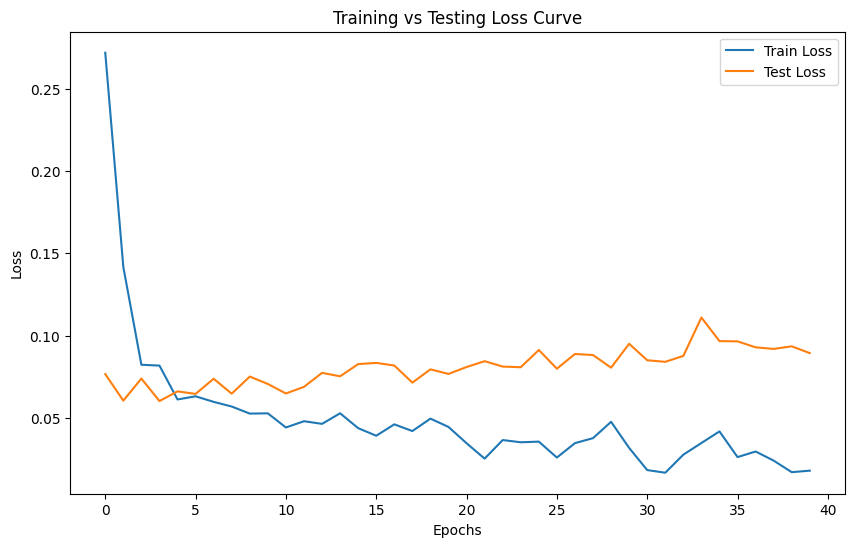

In [ ]:
plt.figure(figsize=(10,6))
plt.plot(range(epochs), train_losses, label='Train Loss')
plt.plot(range(epochs), test_losses, label='Test Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training vs Testing Loss Curve')
plt.legend()
plt.show()


CNN Model Evaluation:
              precision    recall  f1-score   support

           0       0.97      0.99      0.98        71
           1       0.98      0.95      0.96        43

    accuracy                           0.97       114
   macro avg       0.97      0.97      0.97       114
weighted avg       0.97      0.97      0.97       114

Weighted F1 Score: 0.9736
MCC: 0.9439
AUC: 0.9697


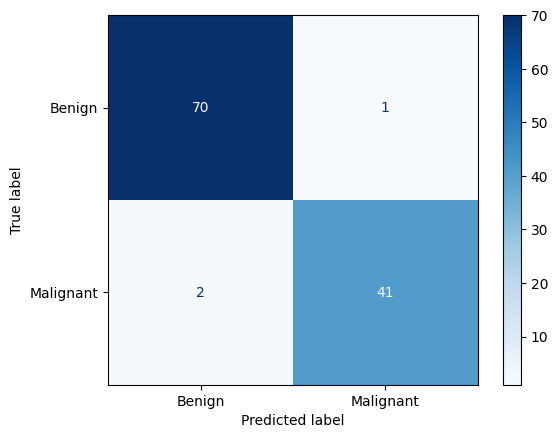

In [ ]:
# Evaluate CNN
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay, f1_score, matthews_corrcoef, roc_auc_score

model.eval()
y_pred_cnn = []
y_true = []

with torch.no_grad():
    for inputs, labels in test_loader:
        inputs = inputs.to(device)
        outputs = model(inputs)
        _, preds = torch.max(outputs, 1)
        y_pred_cnn.extend(preds.cpu().numpy())
        y_true.extend(labels.numpy())

print("CNN Model Evaluation:")
print(classification_report(y_true, y_pred_cnn))
print(f"Weighted F1 Score: {f1_score(y_true, y_pred_cnn, average='weighted'):.4f}")
print(f"MCC: {matthews_corrcoef(y_true, y_pred_cnn):.4f}")
print(f"AUC: {roc_auc_score(y_true, y_pred_cnn):.4f}")

# Confusion Matrix
cm = confusion_matrix(y_true, y_pred_cnn)
disp = ConfusionMatrixDisplay(cm, display_labels=["Benign", "Malignant"])
disp.plot(cmap='Blues')
plt.show()


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [03:20:03] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


XGBoost Model Evaluation:
              precision    recall  f1-score   support

           0       0.96      0.97      0.97        71
           1       0.95      0.93      0.94        43

    accuracy                           0.96       114
   macro avg       0.96      0.95      0.95       114
weighted avg       0.96      0.96      0.96       114

Weighted F1 Score: 0.9560
MCC: 0.9064
AUC: 0.9510


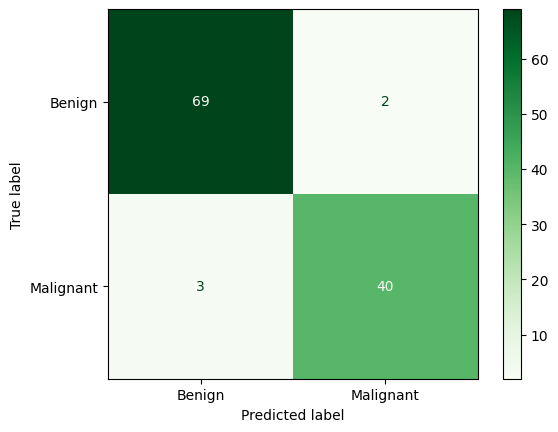

In [ ]:
# Train XGBoost Classifier
from xgboost import XGBClassifier

xgb = XGBClassifier(use_label_encoder=False, eval_metric='logloss')
xgb.fit(X_train, y_train)

y_pred_xgb = xgb.predict(X_test)

print("XGBoost Model Evaluation:")
print(classification_report(y_test, y_pred_xgb))
print(f"Weighted F1 Score: {f1_score(y_test, y_pred_xgb, average='weighted'):.4f}")
print(f"MCC: {matthews_corrcoef(y_test, y_pred_xgb):.4f}")
print(f"AUC: {roc_auc_score(y_test, y_pred_xgb):.4f}")

cm = confusion_matrix(y_test, y_pred_xgb)
disp = ConfusionMatrixDisplay(cm, display_labels=["Benign", "Malignant"])
disp.plot(cmap='Greens')
plt.show()


 Ensemble Model Accuracy: 0.9737

 Classification Report:

              precision    recall  f1-score   support

           0       0.96      1.00      0.98        71
           1       1.00      0.93      0.96        43

    accuracy                           0.97       114
   macro avg       0.98      0.97      0.97       114
weighted avg       0.97      0.97      0.97       114



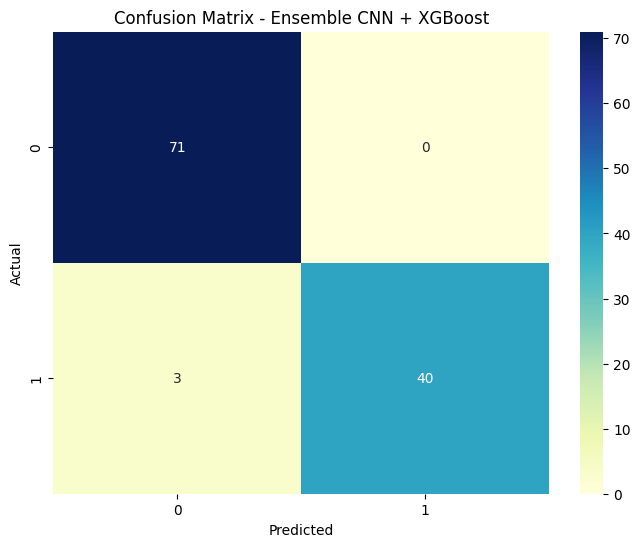

In [ ]:
from scipy.stats import mode

final_preds = []

# Iterate through CNN and XGBoost predictions
for cnn_p, xgb_p in zip(cnn_preds, y_pred_xgb):
    # mode() will always return array shape with keepdims=True
    pred = mode([cnn_p, xgb_p], keepdims=True).mode[0]
    final_preds.append(pred)

# Convert to numpy array
final_preds = np.array(final_preds)

# Evaluate Ensemble Performance
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

ensemble_acc = accuracy_score(y_test, final_preds)
print(f" Ensemble Model Accuracy: {ensemble_acc:.4f}")

# Confusion Matrix
print("\n Classification Report:\n")
print(classification_report(y_test, final_preds))

# Plot Confusion Matrix
import seaborn as sns
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test, final_preds)

plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt="d", cmap="YlGnBu")
plt.title('Confusion Matrix - Ensemble CNN + XGBoost')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


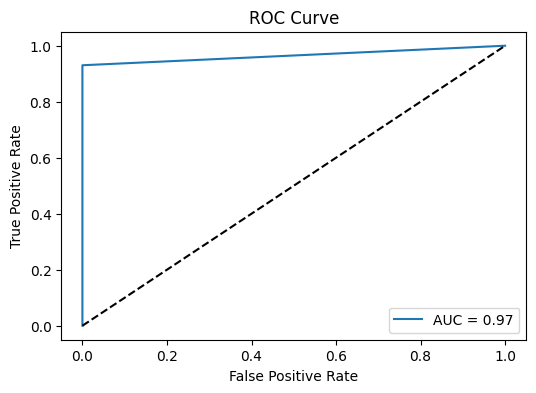

In [ ]:
#ROC Curve
fpr, tpr, thresholds = roc_curve(y_true, y_pred)

plt.figure(figsize=(6,4))
plt.plot(fpr, tpr, label=f"AUC = {roc_auc:.2f}")
plt.plot([0,1],[0,1],'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()
